In [1]:
## UK 2017 GE was weird - but how weird in the context of 2015/2017/2019?

## like<party|leader>, ptv<party>, lr<party>, redist<party>

## add in generalElectionVote??

In [1]:
def weighted_mean(x, **kws):
    val, weight = map(np.asarray, zip(*x))
    mask = (~np.isnan(val))&(~np.isnan(weight))
    val, weight = val[mask],weight[mask]
    return (val * weight).sum() / weight.sum()

In [2]:
def likeChart(stub='like',y_range=[0,6]):
    sns.set(font_scale=1.5)
    if (party_or_leader=="party") & (stub=='like'):
        ques = "Strongly Dislike(0)-Strongly Like(10)"
        title = "How much do you like or dislike each of the following parties?"
    elif (party_or_leader=="leader") & (stub=='like'):
        ques = "Strongly Dislike(0)-Strongly Like(10)"
        title = "How much do you like or dislike each of the following party leaders?"
    elif (party_or_leader=="party") & (stub=='ptv'):
        ques = "Very unlikely(0)-Very likely(10)"
        title = "How likely is it that you would ever vote for each of the following parties?"
    elif (party_or_leader=="party") & (stub=='lr'):
        ques = "Left(0)-Right(10)"
        title = "In politics people sometimes talk of left and right.\nWhere would you place the following parties on this scale?"
    elif (party_or_leader=="leader") & (stub=='lr'):
        ques = "Left(0)-Right(10)"
        title = "In politics people sometimes talk of left and right.\nWhere would you place the following party leaders on this scale?"
    elif (party_or_leader=="party") & (stub=='redist'):
        ques = "Government should try to make incomes equal(0)-\nGovernment should be less concerned about equal incomes(10)"
        title = "Some people feel that government should make much greater efforts to make people's incomes more equal.\nOther people feel that government should be much less concerned about how equal people’s incomes are.\nWhere would you place yourself and the political parties on this scale?"
        
    else:
        raise Exception()

    plt.figure(figsize=(16,8))
    if wts:
        rename_dict = {stub+x+"_wts":x for x in chart_list}
        lvars = list(rename_dict.keys())

        chart_df = df[lvars+[x_axis]]\
                        .melt( id_vars = [x_axis], var_name=party_or_leader, value_name=ques )\
                        .replace(rename_dict)

        sns.lineplot(data=chart_df,
                     x=x_axis, y=ques, hue=party_or_leader,palette=palette,style=party_or_leader,dashes=style_dict,
                     markers=True,
                     estimator=weighted_mean,n_boot=1000 );


    else:
        rename_dict = {stub+x:x for x in chart_list}
        lvars = list(rename_dict.keys())

        chart_df = df[lvars+[x_axis]]\
                        .melt( id_vars = [x_axis], var_name=party_or_leader, value_name=ques )\
                        .replace(rename_dict)

        sns.lineplot(data=chart_df,
                     x=x_axis, y=ques, hue=party_or_leader,palette=palette,style=party_or_leader,dashes=style_dict);

    plt.title(pre_title+"\n"+title,fontsize=24);
    plt.ylim(y_range);
    plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=len(obj_list));    
    plt.hlines(5,chart_df[x_axis].min(),chart_df[x_axis].max(),linestyle='dashdot',alpha=.5);
    
    ax2 = plt.gca().twinx()
    y_span = y_range[1]-y_range[0]
    plt.yticks( (np.arange(y_range[1]+1)/y_span),
                [str(int(x*chart_scale))+"%" for x in (np.arange(1+y_span)/y_span)*(y_span)+y_range[0]] );
    plt.ylabel("% Answering Don't Know");
    

In [3]:
# def prep_data(BES_Panel):
#     var_list = ["wt_daily","CampaignDay"]+["like"+x for x in likevars]

#     dk_frac = " DK%"

#     df = BES_Panel[var_list].copy()
#     for lv in ["like"+x for x in likevars]:
#         df[lv+dk_frac] = (df[lv]=="Don't know").astype(float)*chart_scale
#         df[lv+dk_frac+"_wts"] = list(zip(df[lv+dk_frac],df["wt_daily"]))    

#         ## values range 0-10
#         df[lv] = df[lv].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)*chart_scale/10
#         df[lv+"_wts"] = list(zip(df[lv],df["wt_daily"]))
#     return df

In [4]:
def prep_data(BES_Panel,stub="like"):
    var_list = ["wt_daily","CampaignDay"]+[stub+x for x in likevars]

    df = BES_Panel[var_list].copy()
    for lv in [stub+x for x in likevars]:
        df[lv+dk_frac] = (df[lv]=="Don't know").astype(float)*chart_scale
        df.loc[df[lv].isnull(),lv+dk_frac] = np.nan
        df[lv+dk_frac+"_wts"] = list(zip(df[lv+dk_frac],df["wt_daily"]))    

        ## values range 0-10
        df[lv] = df[lv].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)*chart_scale/10
        df[lv+"_wts"] = list(zip(df[lv],df["wt_daily"]))
    return df

In [5]:
chart_scale=10
y_range = [0,6]
dk_frac = " DK%"

In [6]:
palette_base = {"Con":'b',"Boris":'b',"Cameron":'b',"May":'b',"Johnson":'b',
           "Lab":'r',"Miliband":'r',"Corbyn":'r',
           "LD":"y","Clegg":'y',"Farron":'y',"Swinson":'y',
           "UKIP":'m',"Farage":'m',"BrexitParty":'m',"Nuttall":'m','Brexit':'m',
           "Grn":'g','Bennett':'g',"Lucas":'g',"Bartley":'g',"Berry":'g','greens':'g',"Green":'g',
           "BNP":'k',
           "Self":'c',}

palette = palette_base
palette.update({k+dk_frac:v for k,v in palette_base.items()})
                   

In [8]:
## Check which way campaignDay goes (e.g. 0 is first day, right??? - or last?)

In [9]:
# y_range = [0,.6]

In [10]:
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# # get full set of inferred "cross wave" auth-lib/left-right values and ages
# pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# # pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
# pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
# pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')


In [11]:
## BES Campaign Wave 5: 2015GE

In [8]:
%%time
dataset_name = "W5_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

BES_Panel_2015 = BES_Panel.copy()

# %%time
dataset_name = "W12_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

BES_Panel_2017  = BES_Panel.copy()

# %%time
dataset_name = "W18_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

BES_Panel_2019  = BES_Panel.copy()

Toggle code

Toggle code

Toggle code

Wall time: 1.75 s


In [445]:
## "Don't know"s all fine - double-checked, no variants

In [13]:
# BES_Panel_2015["ashcroft"]

In [447]:
# BES_Panel_2019[search(BES_Panel_2019,"redist|lr|like|ptv").index].stack().value_counts()

# BES_Panel_2017[search(BES_Panel_2017,"redist|lr|like|ptv",case_sensitive=True).index].stack().value_counts()

# BES_Panel_2015[search(BES_Panel_2015,"redist|lr[^_1-5]|like|ptv",case_sensitive=True).index].stack().value_counts()

In [15]:
## some bar chart versions?
## use 'normal' weights

# BES_Panel_2015

def prep_data_bar(BES_Panel,stub="like"):
    var_list = ["wt"]+[stub+x for x in likevars]

    df = BES_Panel[var_list].copy()
    for lv in [stub+x for x in likevars]:
        df[lv+dk_frac] = (df[lv]=="Don't know").astype(float)*chart_scale
        df.loc[df[lv].isnull(),lv+dk_frac] = np.nan
        df[lv+dk_frac+"_wts"] = list(zip(df[lv+dk_frac],df["wt"]))    

        ## values range 0-10
        df[lv] = df[lv].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)*chart_scale/10
        df[lv+"_wts"] = list(zip(df[lv],df["wt"]))
    return df


# def likeChart_bar(stub='like',y_range=[0,6]):
#     sns.set(font_scale=1.5)
#     if (party_or_leader=="party") & (stub=='like'):
#         ques = "Strongly Dislike(0)-Strongly Like(10)"
#         title = "How much do you like or dislike each of the following parties?"
#     elif (party_or_leader=="leader") & (stub=='like'):
#         ques = "Strongly Dislike(0)-Strongly Like(10)"
#         title = "How much do you like or dislike each of the following party leaders?"
#     elif (party_or_leader=="party") & (stub=='ptv'):
#         ques = "Very unlikely(0)-Very likely(10)"
#         title = "How likely is it that you would ever vote for each of the following parties?"
#     elif (party_or_leader=="party") & (stub=='lr'):
#         ques = "Left(0)-Right(10)"
#         title = "In politics people sometimes talk of left and right.\nWhere would you place the following parties on this scale?"
#     elif (party_or_leader=="leader") & (stub=='lr'):
#         ques = "Left(0)-Right(10)"
#         title = "In politics people sometimes talk of left and right.\nWhere would you place the following party leaders on this scale?"
#     elif (party_or_leader=="party") & (stub=='redist'):
#         ques = "Government should try to make incomes equal(0)-\nGovernment should be less concerned about equal incomes(10)"
#         title = "Some people feel that government should make much greater efforts to make people's incomes more equal.\nOther people feel that government should be much less concerned about how equal people’s incomes are.\nWhere would you place yourself and the political parties on this scale?"
        
#     else:
#         raise Exception()

#     plt.figure(figsize=(16,8))
#     if wts:
#         rename_dict = {stub+x+"_wts":x for x in chart_list}
#         lvars = list(rename_dict.keys())

#         chart_df = df[lvars+[x_axis]]\
#                         .melt( id_vars = [x_axis], var_name=party_or_leader, value_name=ques )\
#                         .replace(rename_dict)

#         sns.lineplot(data=chart_df,
#                      x=x_axis, y=ques, hue=party_or_leader,palette=palette,style=party_or_leader,dashes=style_dict,
#                      markers=True,
#                      estimator=weighted_mean,n_boot=1000 );


#     else:
#         rename_dict = {stub+x:x for x in chart_list}
#         lvars = list(rename_dict.keys())

#         chart_df = df[lvars+[x_axis]]\
#                         .melt( id_vars = [x_axis], var_name=party_or_leader, value_name=ques )\
#                         .replace(rename_dict)

#         sns.lineplot(data=chart_df,
#                      x=x_axis, y=ques, hue=party_or_leader,palette=palette,style=party_or_leader,dashes=style_dict);

#     plt.title(pre_title+"\n"+title,fontsize=24);
#     plt.ylim(y_range);
#     plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           fancybox=True, shadow=True, ncol=len(obj_list));    
#     plt.hlines(5,chart_df[x_axis].min(),chart_df[x_axis].max(),linestyle='dashdot',alpha=.5);
    
#     ax2 = plt.gca().twinx()
#     y_span = y_range[1]-y_range[0]
#     plt.yticks( (np.arange(y_range[1]+1)/y_span),
#                 [str(int(x*chart_scale))+"%" for x in (np.arange(1+y_span)/y_span)*(y_span)+y_range[0]] );
#     plt.ylabel("% Answering Don't Know");
    

In [59]:
search(BES_Panel_2015.rename(columns={"leftRight":"lrSelf"}),"lrSelf")
# df2015

lrSelf    30959
dtype: int64

In [62]:
# BES_Panel_2015.rename(columns={"leftRight":"lrSelf"})
# df2015

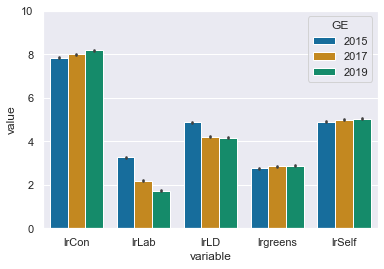

In [63]:
likevars = ["Con","Lab","LD","greens","Self"]
# "UKIP","UKIP","BrexitParty"
# "Corbyn","May"
# "Self"

# leftRight

stub = 'lr'
df2015 = prep_data_bar(BES_Panel_2015.rename(columns={"leftRight":"lrSelf"}),stub=stub)
df2017 = prep_data_bar(BES_Panel_2017.rename(columns={"leftRight":"lrSelf"}),stub=stub)
df2019 = prep_data_bar(BES_Panel_2019.rename(columns={"leftRight":"lrSelf"}),stub=stub)

df2015["GE"] = "2015"
df2017["GE"] = "2017"
df2019["GE"] = "2019"

df = pd.concat([df2015,df2017,df2019])
df = df.melt(id_vars = ["wt","GE"])

var_list = [stub+x for x in likevars ]

sns.barplot(data=df[ df["variable"].isin(var_list) ].dropna(),
            y="value",x="variable",hue="GE");
plt.ylim([0,10]);

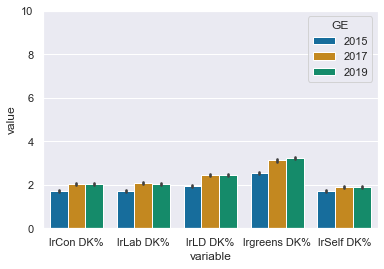

In [64]:
likevars = ["Con","Lab","LD","greens","Self"]
# "UKIP","UKIP","BrexitParty"
# "Corbyn","May"


stub = 'lr'
df2015 = prep_data_bar(BES_Panel_2015.rename(columns={"leftRight":"lrSelf"}) ,stub=stub)
df2017 = prep_data_bar(BES_Panel_2017.rename(columns={"leftRight":"lrSelf"}) ,stub=stub)
df2019 = prep_data_bar(BES_Panel_2019.rename(columns={"leftRight":"lrSelf"}) ,stub=stub)

df2015["GE"] = "2015"
df2017["GE"] = "2017"
df2019["GE"] = "2019"

var_list = [stub+x+dk_frac for x in likevars ]

df = pd.concat([df2015,df2017,df2019])
df = df.melt(id_vars = ["wt","GE"])

sns.barplot(data=df[ df["variable"].isin(var_list) ].dropna(),
            y="value",x="variable",hue="GE");
plt.ylim([0,10]);

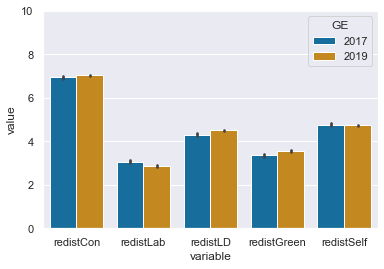

In [43]:
likevars = ["Con","Lab","LD","Green","Self"]
# "UKIP","UKIP","BrexitParty"
# "Corbyn","May"

var_list = ["redist"+x for x in likevars ]

stub = 'redist'
# df2015 = prep_data_bar(BES_Panel_2015,stub=stub)
df2017 = prep_data_bar(BES_Panel_2017,stub=stub)
df2019 = prep_data_bar(BES_Panel_2019,stub=stub)

# df2015["GE"] = "2015"
df2017["GE"] = "2017"
df2019["GE"] = "2019"

df = pd.concat([df2017,df2019])
df = df.melt(id_vars = ["wt","GE"])

sns.barplot(data=df[ df["variable"].isin(var_list) ].dropna(),
            y="value",x="variable",hue="GE");
plt.ylim([0,10]);

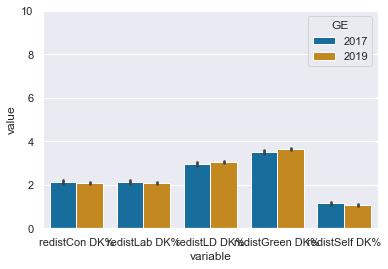

In [65]:
likevars = ["Con","Lab","LD","Green","Self"]
# "UKIP","UKIP","BrexitParty"
# "Corbyn","May"



stub = 'redist'
var_list = [stub+x+dk_frac for x in likevars ]
# df2015 = prep_data_bar(BES_Panel_2015,stub=stub)
df2017 = prep_data_bar(BES_Panel_2017,stub=stub)
df2019 = prep_data_bar(BES_Panel_2019,stub=stub)

# df2015["GE"] = "2015"
df2017["GE"] = "2017"
df2019["GE"] = "2019"

df = pd.concat([df2017,df2019])
df = df.melt(id_vars = ["wt","GE"])

sns.barplot(data=df[ df["variable"].isin(var_list) ].dropna(),
            y="value",x="variable",hue="GE");
plt.ylim([0,10]);

In [40]:
search(BES_Panel_2017,"redist")

redistSelf     8820
redistCon      8820
redistLab      8820
redistLD       8820
redistUKIP     8820
redistSNP      1134
redistPC        638
redistGreen    8820
dtype: int64

In [41]:
search(BES_Panel_2019,"redist")

redistSelf      37825
redistCon       37825
redistLab       37825
redistLD        37825
redistSNP        3905
redistPC         2379
redistBrexit    37825
redistGreen     37825
dtype: int64

In [23]:
search(BES_Panel_2015,"lr")
# BES_Panel_2015["ptvCon"].value_counts()

# stubs = ["lr","redist"]

# ashcroft: 2015, 2017
# generalElectionVote: 

lrCon           30959
lrLab           30959
lrLD            30959
lrUKIP          30959
lrSNP            5550
lrPC             2961
lrgreens        30959
lr1             30585
lr2             30585
lr3             30585
lr4             30585
lr5             30585
lr_scale        28346
LRAL_mii_cat    27749
dtype: int64

Wall time: 3min 14s


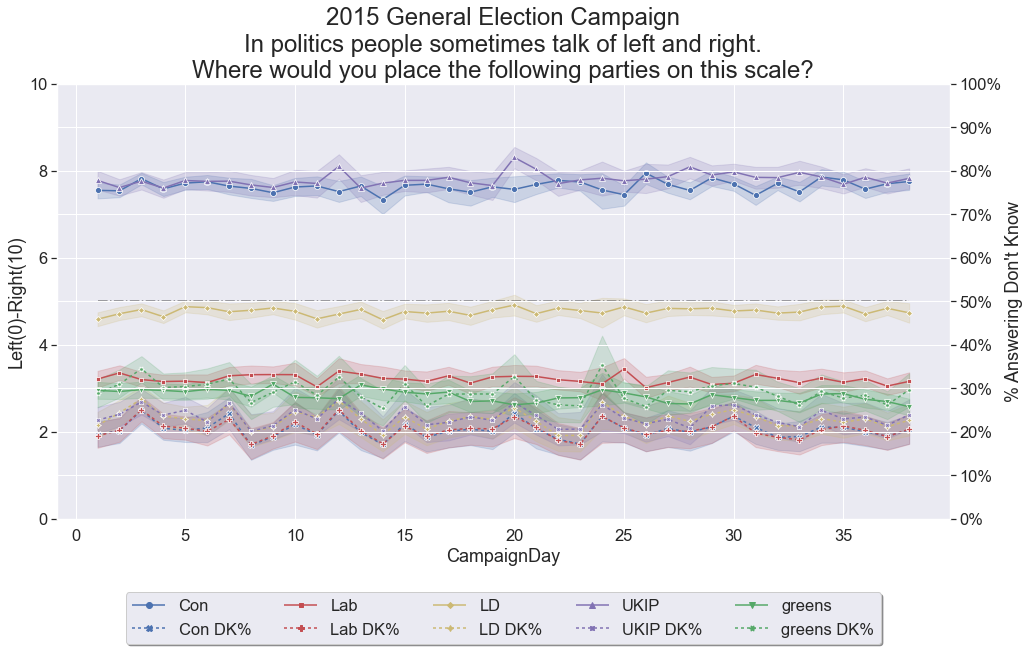

In [449]:
%%time
likevars = ["Con","Lab","LD",
     "UKIP","greens",
     "SNP","PC",]
stub = 'lr'
df = prep_data(BES_Panel_2015,stub=stub)

obj_list = ["Con","Lab","LD","UKIP","greens"]

chart_list = flatten([[x,x+dk_frac] for x in obj_list])

style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))

wts = True
party_or_leader = "party"
x_axis="CampaignDay"
pre_title = "2015 General Election Campaign"
likeChart(stub=stub,y_range=[0,10])


In [450]:
# %debug

> c:\programdata\anaconda3\envs\bes_analysis\lib\site-packages\pandas\core\indexing.py(662)_get_setitem_indexer()
    660             if "cannot do" in str(e):
    661                 raise
--> 662             raise IndexingError(key)
    663 
    664     def __setitem__(self, key, value):

ipdb> quit


Wall time: 4min 11s


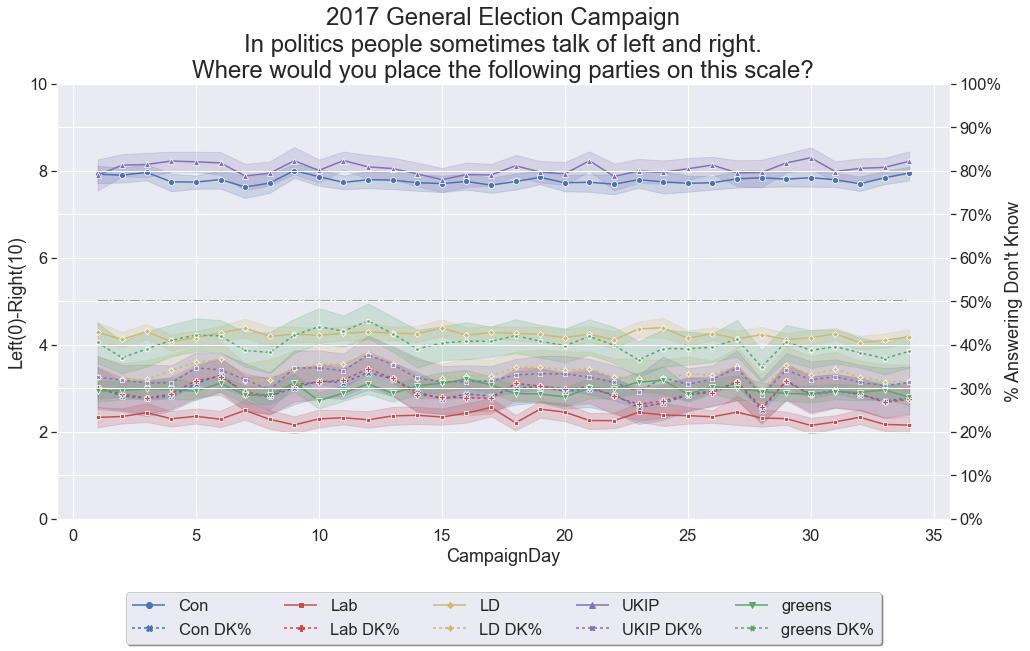

In [451]:
%%time
likevars = ["Con","Lab","LD",
     "UKIP","greens",
     "SNP","PC",]
stub = 'lr'
df = prep_data(BES_Panel_2017,stub=stub)

obj_list = ["Con","Lab","LD","UKIP","greens"]

chart_list = flatten([[x,x+dk_frac] for x in obj_list])

style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))

wts = True
party_or_leader = "party"
x_axis="CampaignDay"
pre_title = "2017 General Election Campaign"
likeChart(stub=stub,y_range=[0,10])



Wall time: 2min 10s


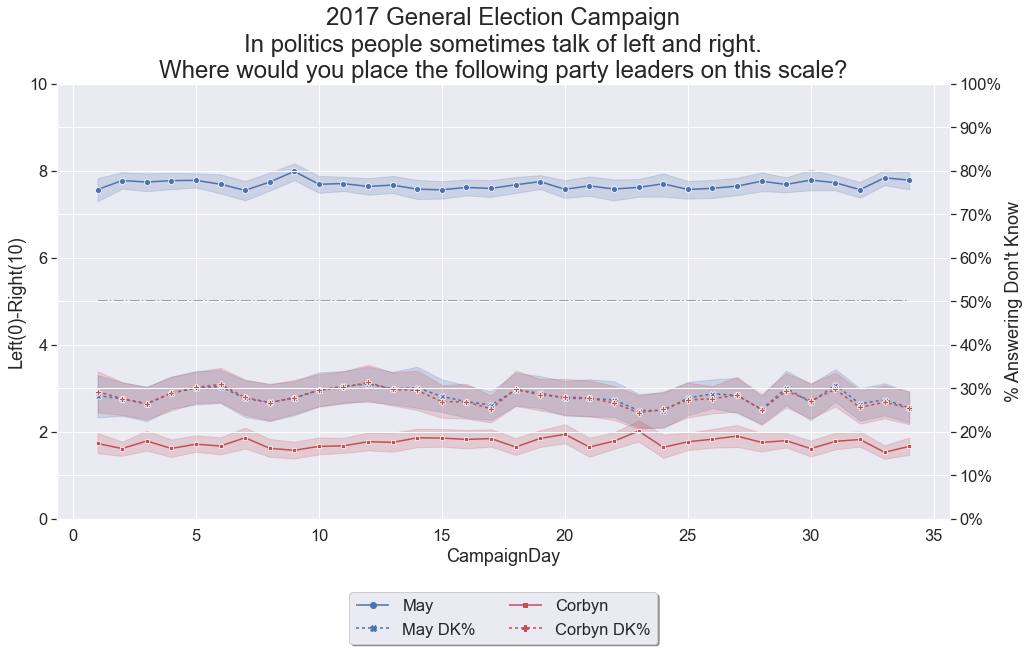

In [452]:
%%time
likevars = ["May","Corbyn"]
stub = 'lr'
df = prep_data(BES_Panel_2017,stub=stub)

obj_list = ["May","Corbyn"]

chart_list = flatten([[x,x+dk_frac] for x in obj_list])

style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))

wts = True
party_or_leader = "leader"
x_axis="CampaignDay"
pre_title = "2017 General Election Campaign"
likeChart(stub=stub,y_range=[0,10])



Wall time: 6min


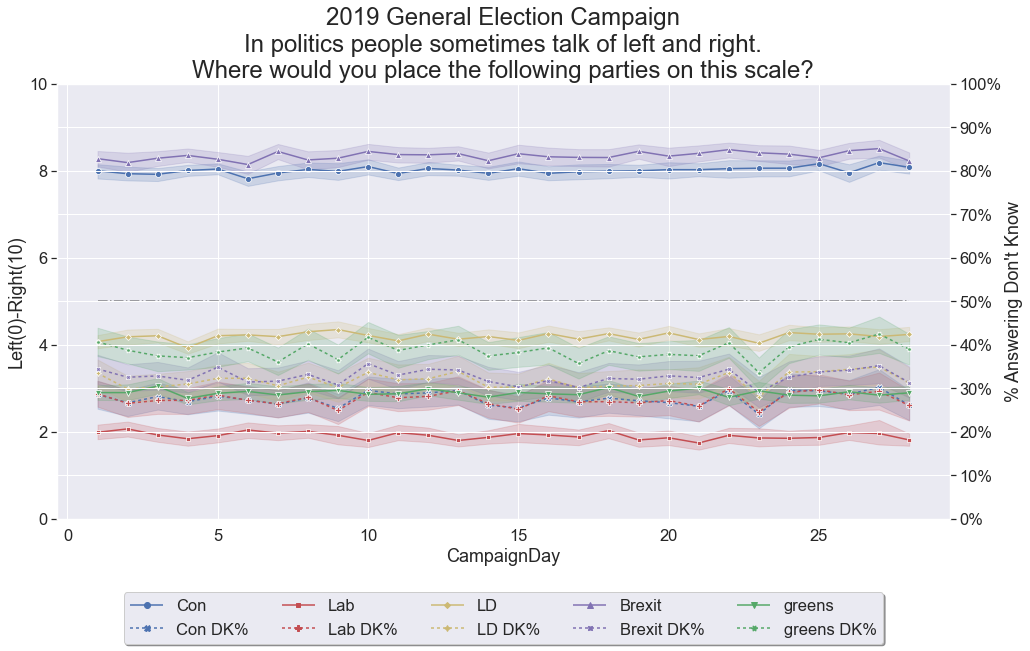

In [453]:
%%time
likevars = ["Con","Lab","LD",
     "Brexit","greens",
     "SNP","PC",]
stub = 'lr'
df = prep_data(BES_Panel_2019,stub=stub)

obj_list = ["Con","Lab","LD","Brexit","greens"]

chart_list = flatten([[x,x+dk_frac] for x in obj_list])

style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))

wts = True
party_or_leader = "party"
x_axis="CampaignDay"
pre_title = "2019 General Election Campaign"
likeChart(stub=stub,y_range=[0,10])



In [454]:
### redist

Wall time: 6min 24s


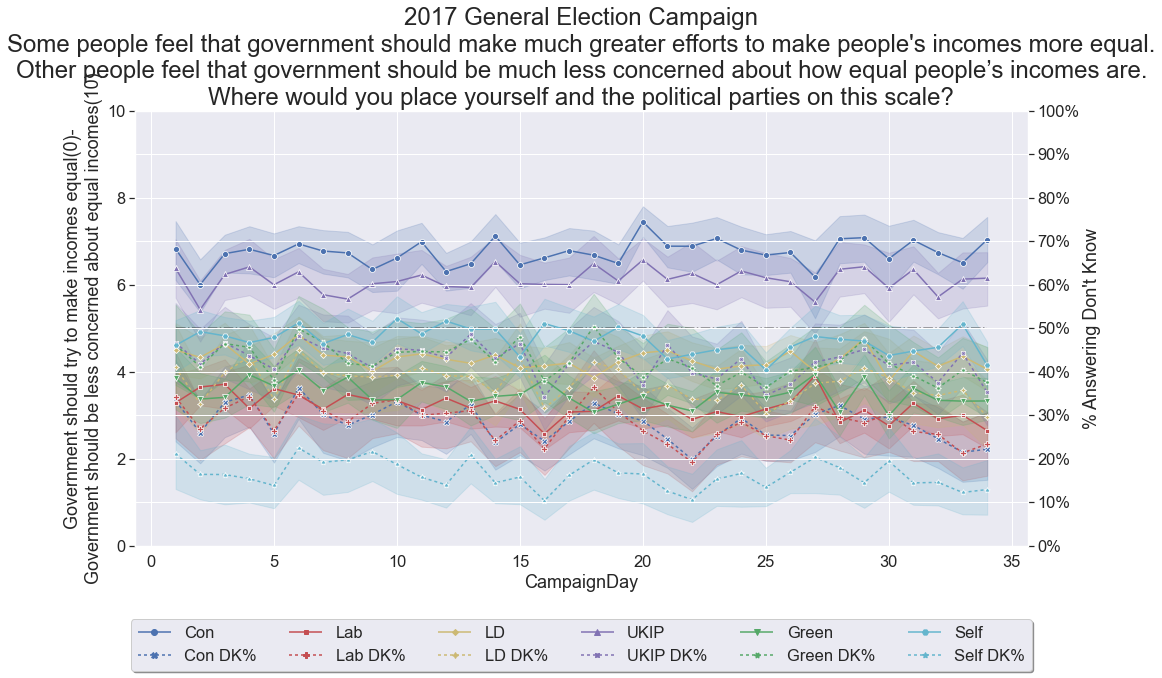

In [455]:
%%time
likevars = ["Con","Lab","LD",
     "UKIP","Green",
     "SNP","PC",
     "Self",]
stub = 'redist'
df = prep_data(BES_Panel_2017,stub=stub)

obj_list = ["Con","Lab","LD","UKIP","Green","Self"]

chart_list = flatten([[x,x+dk_frac] for x in obj_list])

style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))

wts = True
party_or_leader = "party"
x_axis="CampaignDay"
pre_title = "2017 General Election Campaign"
likeChart(stub=stub,y_range=[0,10])



Wall time: 7min 3s


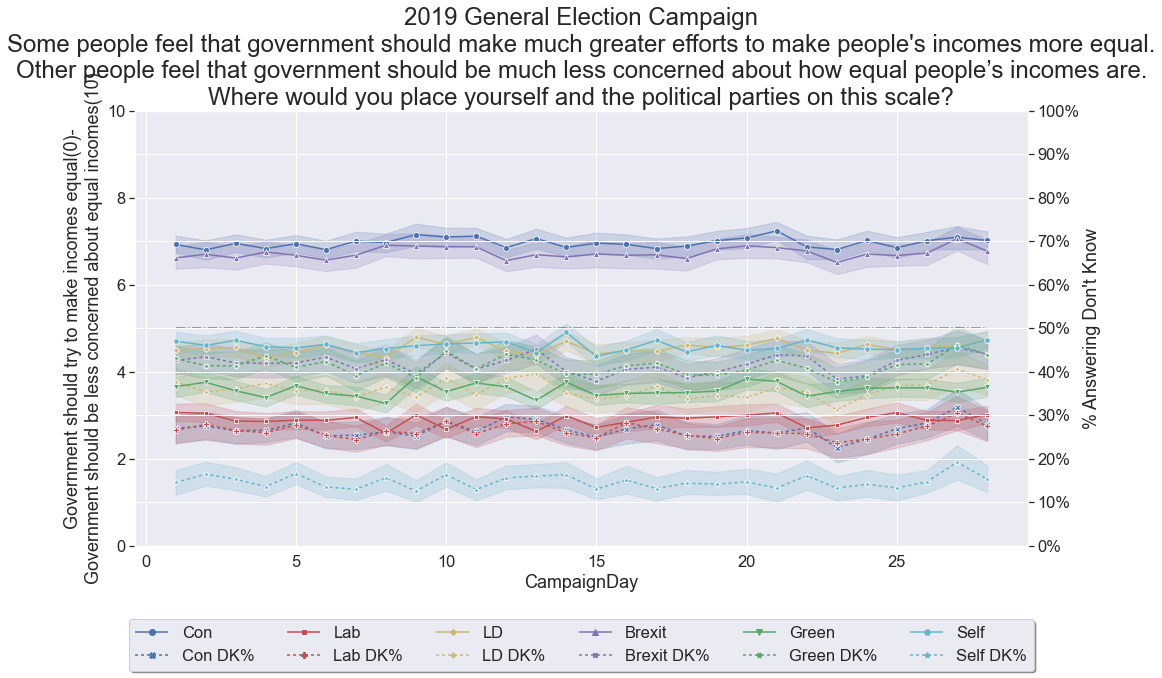

In [456]:
%%time
likevars = ["Con","Lab","LD",
     "Brexit","Green",
     "SNP","PC",
     "Self"]
stub = 'redist'
df = prep_data(BES_Panel_2019,stub=stub)

obj_list = ["Con","Lab","LD","Brexit","Green","Self"]

chart_list = flatten([[x,x+dk_frac] for x in obj_list])

style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))

wts = True
party_or_leader = "party"
x_axis="CampaignDay"
pre_title = "2019 General Election Campaign"
likeChart(stub=stub,y_range=[0,10])



Wall time: 5min 53s


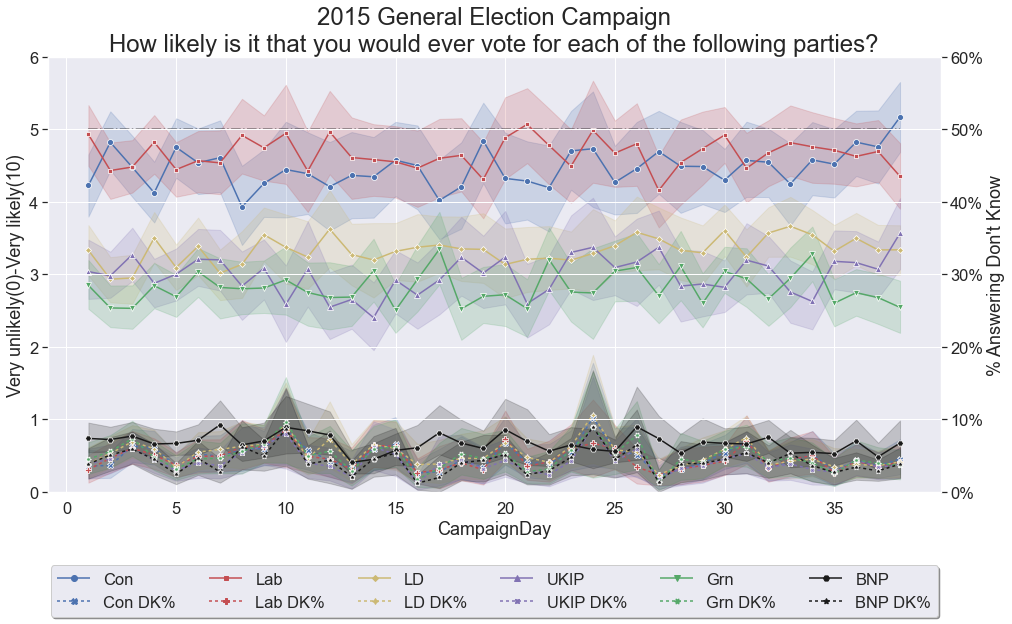

In [457]:
%%time
likevars = ["Con","Lab","LD",
     "UKIP","Grn","BNP",
     "SNP","PC",]

df = prep_data(BES_Panel_2015,stub='ptv')

obj_list = ["Con","Lab","LD","UKIP","Grn","BNP"]

chart_list = flatten([[x,x+dk_frac] for x in obj_list])

style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))

wts = True
party_or_leader = "party"
x_axis="CampaignDay"
pre_title = "2015 General Election Campaign"
likeChart(stub='ptv')



Wall time: 5min 29s


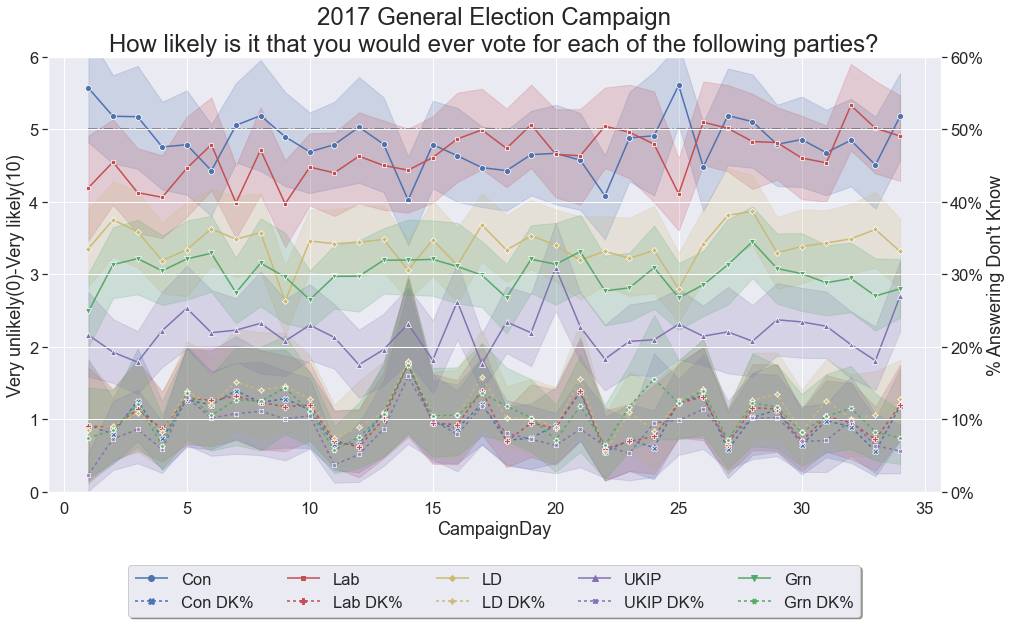

In [458]:
%%time
likevars = ["Con","Lab","LD",
     "UKIP","Grn",
     "SNP","PC",]

df = prep_data(BES_Panel_2017,stub='ptv')

obj_list = ["Con","Lab","LD","UKIP","Grn"]

chart_list = flatten([[x,x+dk_frac] for x in obj_list])

style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))

wts = True
party_or_leader = "party"
x_axis="CampaignDay"
pre_title = "2017 General Election Campaign"
likeChart(stub='ptv')

Wall time: 7min 20s


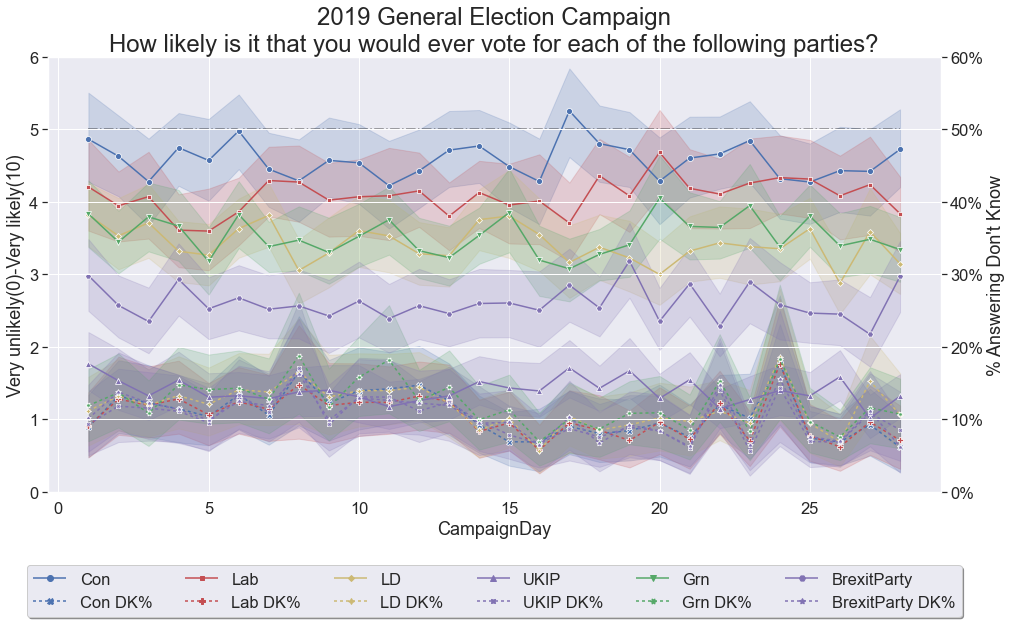

In [459]:
%%time
likevars = ["Con","Lab","LD",
     "UKIP","Grn","BrexitParty",
     "SNP","PC",]

df = prep_data(BES_Panel_2019,stub='ptv')

obj_list = ["Con","Lab","LD","UKIP","Grn","BrexitParty"]

chart_list = flatten([[x,x+dk_frac] for x in obj_list])

style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))

wts = True
party_or_leader = "party"
x_axis="CampaignDay"
pre_title = "2019 General Election Campaign"
likeChart(stub='ptv')

In [460]:
# %debug

Wall time: 4min 4s


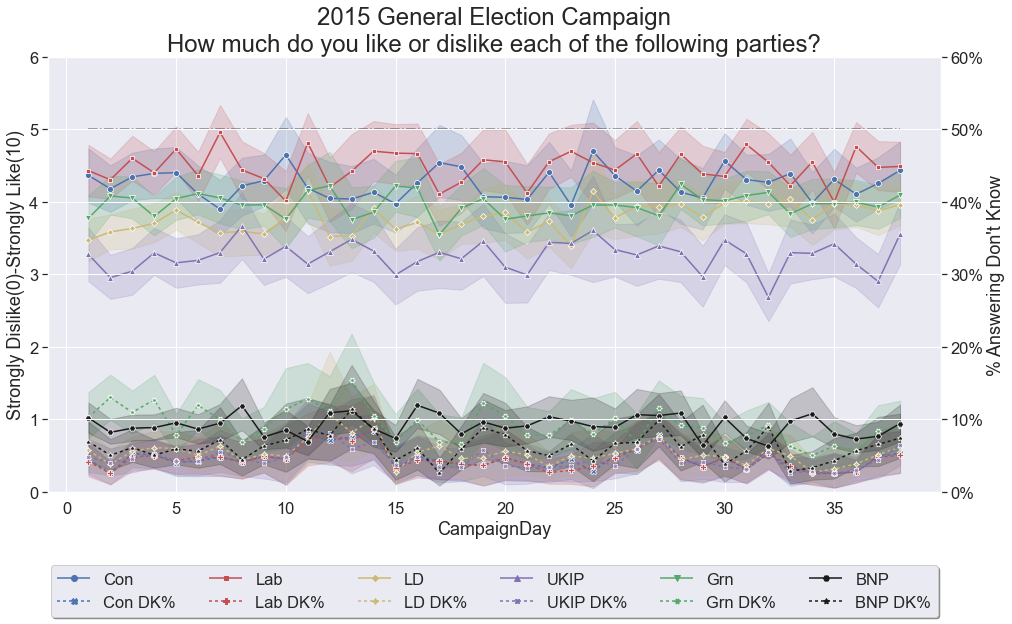

In [472]:
%%time

likevars = ["Cameron","Miliband","Clegg",
     "Farage","Bennett",
     "Sturgeon","Wood",
     "Con","Lab","LD",
     "UKIP","Grn","BNP",
     "SNP","PC",]

df = prep_data(BES_Panel_2015)

obj_list = ["Con","Lab","LD","UKIP","Grn","BNP"]
# ,"Bartley","Berry",

chart_list = flatten([[x,x+dk_frac] for x in obj_list])
# chart_list = ["Con"+dk_frac,"Lab"+dk_frac]
# palette = {"Boris":'b',"Corbyn":'r',"Boris"+dk_frac:'b',"Corbyn"+dk_frac:'r',}
style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))
#['--' if "_dk" in x else '-' for x in chart_list]


#
wts = True
party_or_leader = "party"
x_axis="CampaignDay"
pre_title = "2015 General Election Campaign"
likeChart()



Wall time: 3min 17s


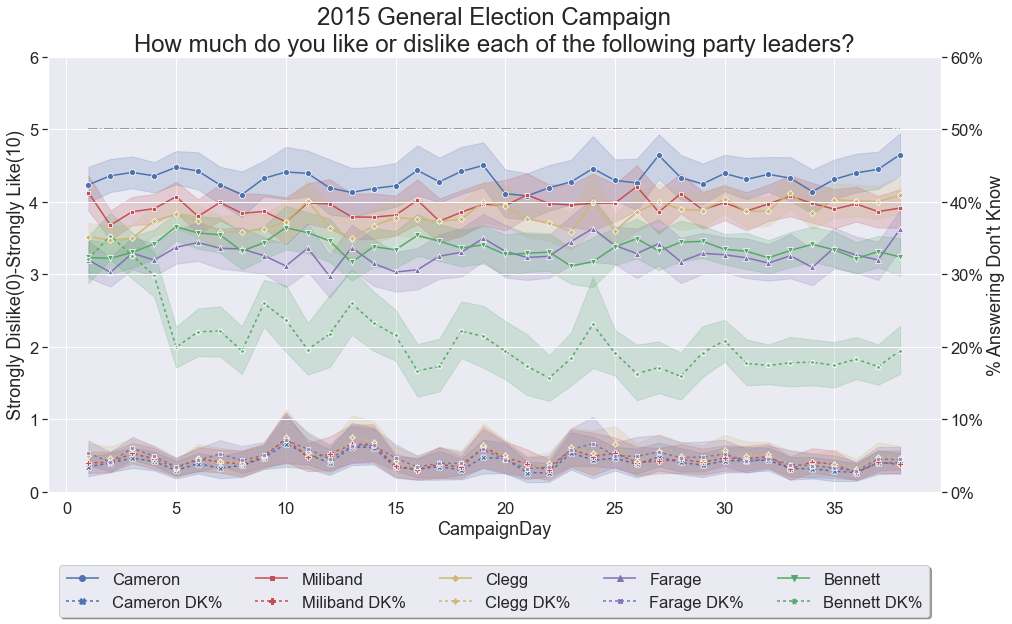

In [473]:
%%time

likevars = ["Cameron","Miliband","Clegg",
     "Farage","Bennett",
     "Sturgeon","Wood",
     "Con","Lab","LD",
     "UKIP","Grn","BNP",
     "SNP","PC",]

df = prep_data(BES_Panel_2015)

obj_list = ["Cameron","Miliband","Clegg","Farage","Bennett"]
# ,"Bartley","Berry",

chart_list = flatten([[x,x+dk_frac] for x in obj_list])
# chart_list = ["Con"+dk_frac,"Lab"+dk_frac]
# palette = {"Boris":'b',"Corbyn":'r',"Boris"+dk_frac:'b',"Corbyn"+dk_frac:'r',}
style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))
#['--' if "_dk" in x else '-' for x in chart_list]
#
wts = True
party_or_leader = "leader"
x_axis="CampaignDay"
# y_range = [0,.6]
pre_title = "2015 General Election Campaign"
likeChart()

In [464]:
## BES Campaign Wave 12: 2017GE

In [465]:
likevars = ["May","Corbyn","Farron",
     "Nuttall","Lucas",
     "Sturgeon","Wood",
     "Con","Lab","LD",
     "UKIP","Grn",
     "SNP","PC",]

df = prep_data(BES_Panel_2017)

Wall time: 5min 34s


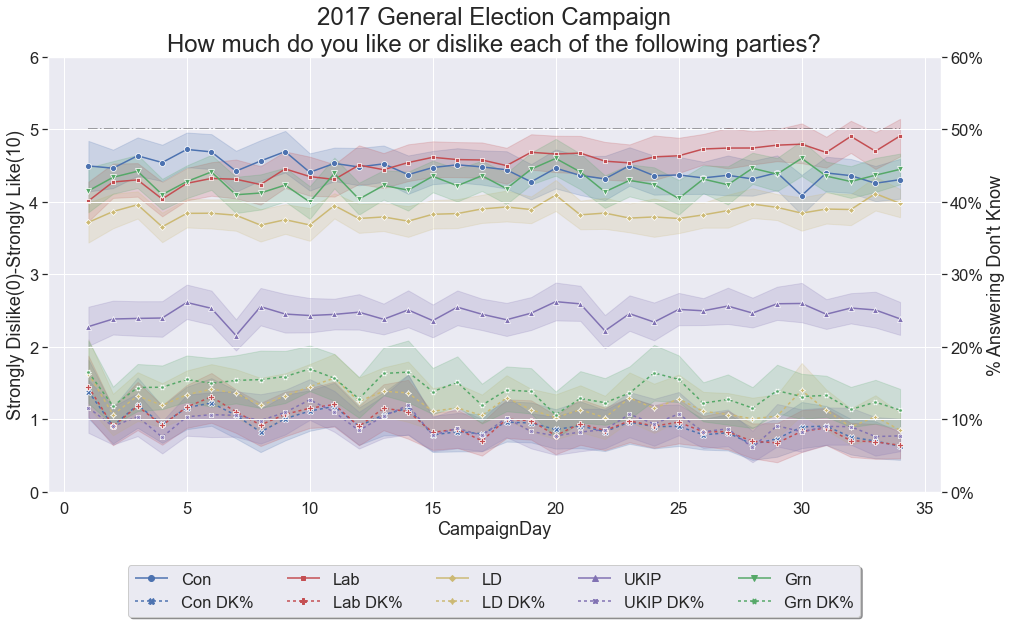

In [466]:
%%time

obj_list = ["Con","Lab","LD","UKIP","Grn"]

chart_list = flatten([[x,x+dk_frac] for x in obj_list])
style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))
wts = True
party_or_leader = "party"
x_axis="CampaignDay"
# y_range = [0,.6]
pre_title = "2017 General Election Campaign"
likeChart()

Wall time: 5min 21s


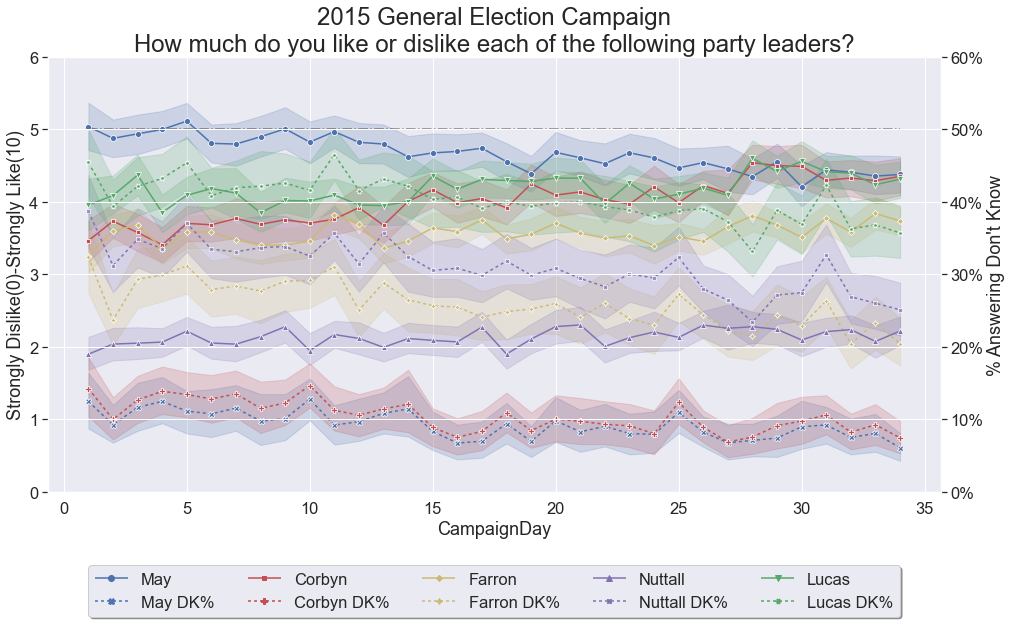

In [467]:
%%time

obj_list = ["May","Corbyn","Farron","Nuttall","Lucas"]


chart_list = flatten([[x,x+dk_frac] for x in obj_list])
style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))
wts = True
party_or_leader = "leader"
x_axis="CampaignDay"
# y_range = [0,.6]
pre_title = "2017 General Election Campaign"
likeChart()

In [468]:
## BES Campaign Wave 18: 2019GE

In [469]:
likevars = \
    ["Boris","Corbyn","Swinson",
     "Farage","Bartley","Berry",
     "Sturgeon","Price",
     "Con","Lab","LD",
     "UKIP","Grn","BrexitParty",
     "SNP","PC",]

df = prep_data(BES_Panel_2019)

Wall time: 6min 14s


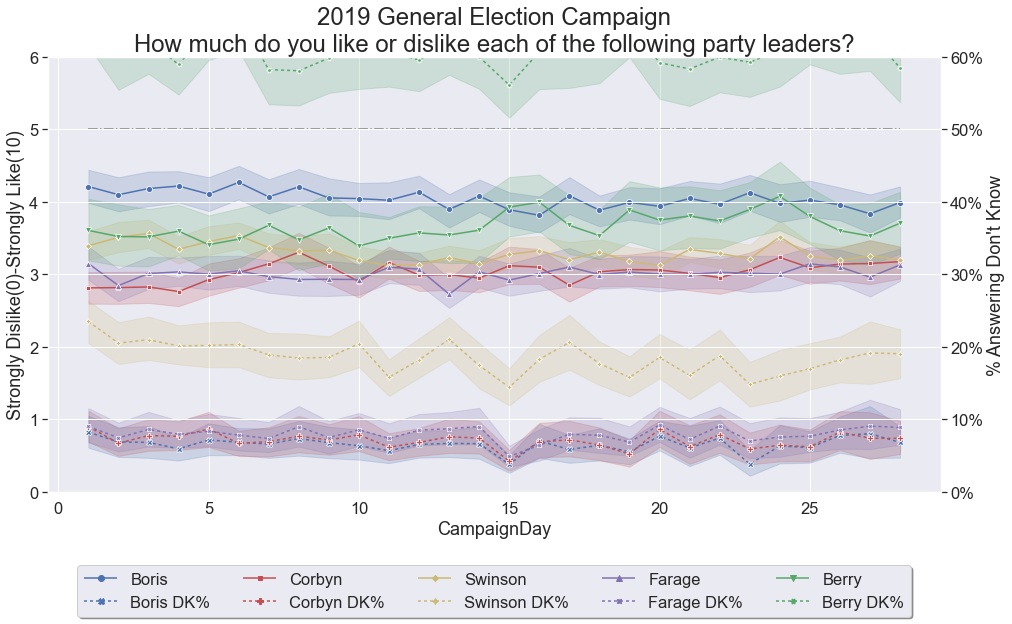

In [470]:
%%time

obj_list = ["Boris","Corbyn","Swinson","Farage","Berry"]

chart_list = flatten([[x,x+dk_frac] for x in obj_list])
style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))
wts = True
party_or_leader = "leader"
x_axis="CampaignDay"
# y_range = [0,.6]
pre_title = "2019 General Election Campaign"
likeChart()

Wall time: 7min 20s


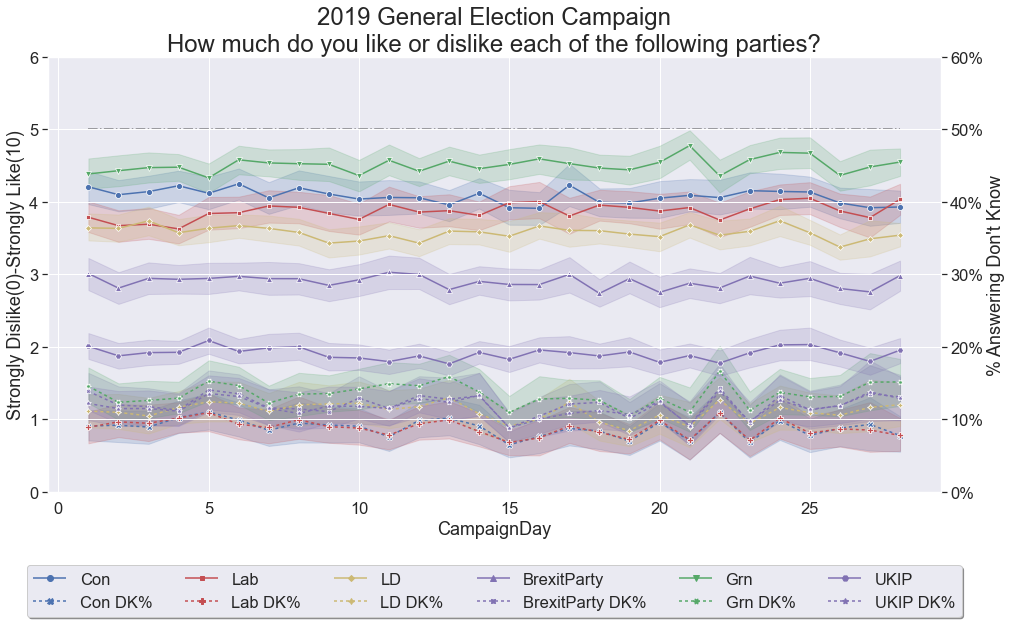

In [471]:
%%time

obj_list = ["Con","Lab","LD","BrexitParty","Grn","UKIP"]

chart_list = flatten([[x,x+dk_frac] for x in obj_list])
style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))
wts = True
party_or_leader = "party"
x_axis="CampaignDay"
# y_range = [0,.6]
pre_title = "2019 General Election Campaign"
likeChart()

In [ ]:
## TO DO: Try to nail down how much is due to change of sentiment vs DK -> Some Value?

## Might be good to view as a Sankey Chart

## Try including 5/10 as DK
# DK+ -> DK+
# DK+ -> Some value
# Some value -> DK+

Wall time: 3min 39s


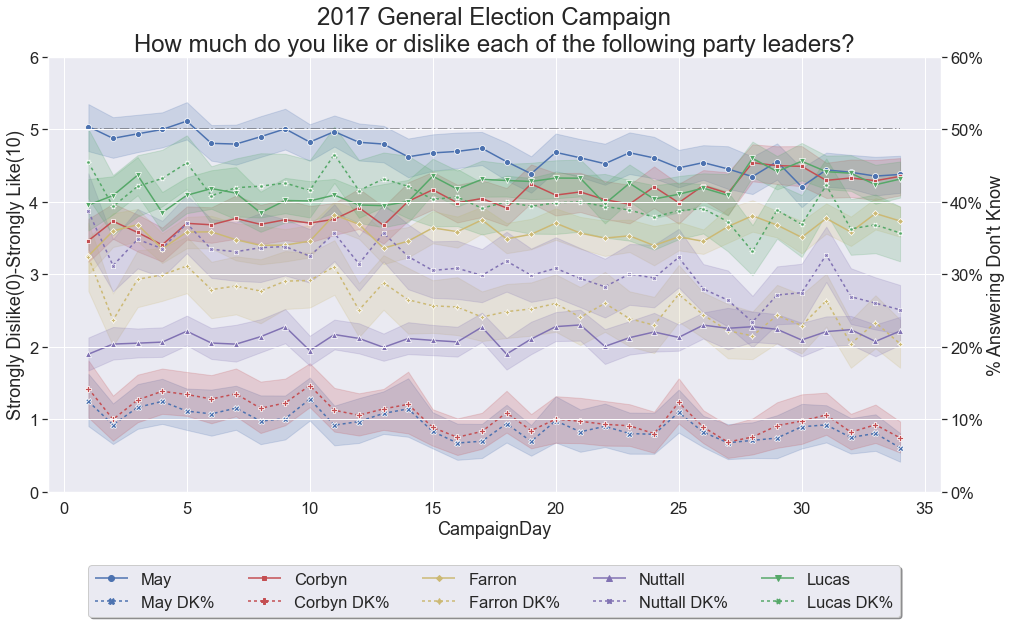

In [10]:
%%time

likevars = ["May","Corbyn","Farron",
     "Nuttall","Lucas",
     "Sturgeon","Wood",
     "Con","Lab","LD",
     "UKIP","Grn",
     "SNP","PC",]

df = prep_data(BES_Panel_2017)

obj_list = ["May","Corbyn","Farron","Nuttall","Lucas"]


chart_list = flatten([[x,x+dk_frac] for x in obj_list])
style_dict = dict(zip(chart_list,[(2, 2) if dk_frac in x else (2, 0) for x in chart_list]))
wts = True
party_or_leader = "leader"
x_axis="CampaignDay"
# y_range = [0,.6]
pre_title = "2017 General Election Campaign"
likeChart()

In [ ]:
## TO DO: The Conservatives Have Not Moved Left

In [1]:
%%time
dataset_name = "W19_comb"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')


Toggle code

var_type (8079, 14)
Wall time: 17.1 s


Text(0.5, 1.0, 'Conservatives Mean Perceived Economic Left-Right Position\nW2-W18 British Election Study')

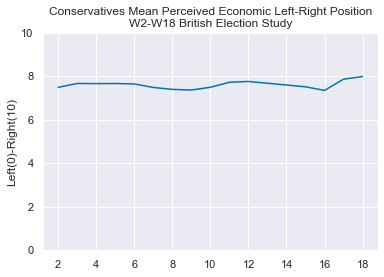

In [61]:
lrCon = BES_Panel[search(BES_Panel,"lrCon").index].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
num_to_weight = {x: search(BES_Panel,"wt_(new|full)_W"+str(x)+"($|_result)").index[0] for x in range(1,20)}

df = pd.Series()
for col in lrCon.columns:
    pos = int(col.split("W")[1])
    df.loc[pos] = weighted_mean( pd.Series(list(zip(lrCon[col],BES_Panel[num_to_weight[pos]]))) )

df.plot()
plt.ylim([0,10]);
plt.ylabel("Left(0)-Right(10)")
plt.title("Conservatives Mean Perceived Economic Left-Right Position\nW2-W18 British Election Study")
# search(BES_Panel, "p_past")

Text(0.5, 1.0, 'Conservatives Mean Perceived Economic Left-Right Position\nW2-W18 British Election Study')

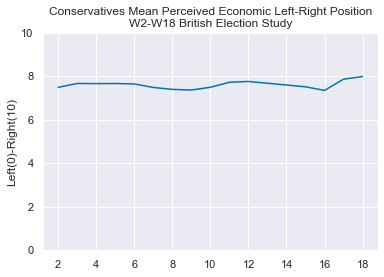

In [59]:
df

2     7.494081
3     7.672128
4     7.665530
5     7.670970
6     7.650884
7     7.489485
8     7.400081
9     7.370911
10    7.498518
11    7.727612
12    7.764943
15    7.518512
16    7.354496
17    7.869266
18    7.992756
dtype: float64

In [63]:
Prior_Conservative_Vote = (BES_Panel[["p_past_vote_2005","p_past_vote_2010","p_past_vote_2015","p_past_vote_2017"]]=="Conservative").any(axis=1)
Con_Vote_2019 = BES_Panel["p_past_vote_2019"]=="Conservative"
First_Time_Conservative = ((~Prior_Conservative_Vote)&Con_Vote_2019)

In [67]:
search(BES_Panel,"^redistCon")

redistConW1     30517
redistConW2     30218
redistConW3     27831
redistConW4     31530
redistConW6     30253
redistConW7     30895
redistConW10    30237
redistConW11    30956
redistConW12     8820
redistConW13    31136
redistConW14    31063
redistConW15    30842
redistConW16    37959
redistConW17    34366
redistConW18    37825
redistConW19    32177
dtype: int64

Text(0.5, 1.0, 'Conservatives Mean Perceived Economic Left-Right Position\nW2-W18 British Election Study\nFirst Time Conservatives Only')

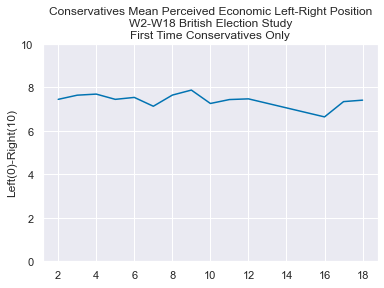

In [64]:
lrCon = BES_Panel[search(BES_Panel,"lrCon").index].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
num_to_weight = {x: search(BES_Panel,"wt_(new|full)_W"+str(x)+"($|_result)").index[0] for x in range(1,20)}

df = pd.Series()
for col in lrCon.columns:
    pos = int(col.split("W")[1])
    df.loc[pos] = weighted_mean( pd.Series(list(zip(lrCon[col][First_Time_Conservative],BES_Panel[num_to_weight[pos]][First_Time_Conservative]))) )

df.plot()
plt.ylim([0,10]);
plt.ylabel("Left(0)-Right(10)")
plt.title("Conservatives Mean Perceived Economic Left-Right Position\nW2-W18 British Election Study\nFirst Time Conservatives Only")
# search(BES_Panel, "p_past")

Text(0.5, 1.0, 'Conservatives Mean Perceived Redistribution Position\nW2-W18 British Election Study\nFirst Time Conservatives Only')

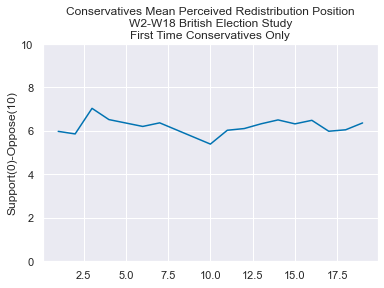

In [69]:
lrCon = BES_Panel[search(BES_Panel,"^redistCon").index].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
num_to_weight = {x: search(BES_Panel,"wt_(new|full)_W"+str(x)+"($|_result)").index[0] for x in range(1,20)}

df = pd.Series()
for col in lrCon.columns:
    pos = int(col.split("W")[1])
    df.loc[pos] = weighted_mean( pd.Series(list(zip(lrCon[col][First_Time_Conservative],BES_Panel[num_to_weight[pos]][First_Time_Conservative]))) )

df.plot()
plt.ylim([0,10]);
plt.ylabel("Support(0)-Oppose(10)")
plt.title("Conservatives Mean Perceived Redistribution Position\nW2-W18 British Election Study\nFirst Time Conservatives Only")
# search(BES_Panel, "p_past")

In [ ]:
search(BES_Panel,"^redistCon")